In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 120s 10us/step


In [5]:
len(X_train)

60000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

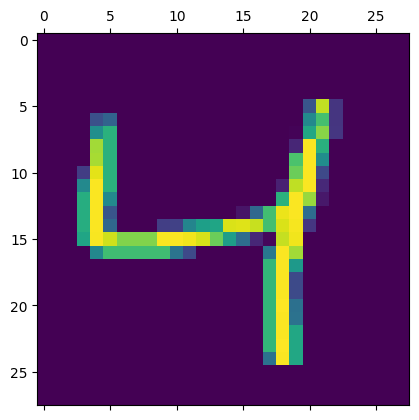

In [9]:
plt.matshow(X_train[2])

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

scaling

In [15]:
X_train = X_train / 255
X_test = X_test / 255

convert our matrix 28*28 into a single array, each case is a neuron

In [16]:
X_train_flattend = X_train.reshape(len(X_train), 28*28)
X_test_flattend = X_test.reshape(len(X_test), 28*28)

create a simple neuron net

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4709 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9259


In [18]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2684 - accuracy: 0.9256


[0.26841723918914795, 0.925599992275238]

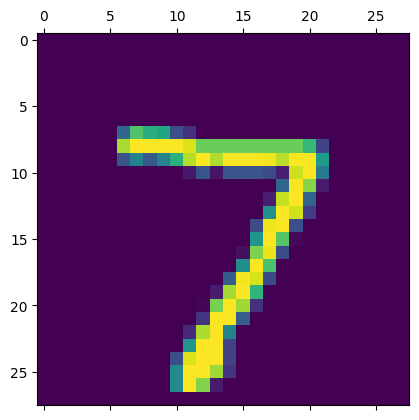

In [19]:
plt.matshow(X_test[0])

In [20]:
y_predicted = model.predict(X_test_flattend)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([3.1262722e-02, 1.9150251e-07, 5.2902084e-02, 9.6304494e-01,
       1.7801311e-03, 1.0297236e-01, 1.2531506e-06, 9.9979758e-01,
       6.6018283e-02, 6.3874739e-01], dtype=float32)

In [21]:
np.argmax(y_predicted[0])

7

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [25]:
y_predicted[:5]

array([[3.12627219e-02, 1.91502508e-07, 5.29020838e-02, 9.63044941e-01,
        1.78013113e-03, 1.02972358e-01, 1.25315057e-06, 9.99797583e-01,
        6.60182834e-02, 6.38747394e-01],
       [5.69937348e-01, 4.30289237e-03, 9.99374449e-01, 5.07283390e-01,
        6.48539888e-10, 8.53628099e-01, 8.91555429e-01, 1.07129301e-12,
        1.62006497e-01, 7.05949521e-09],
       [3.53848416e-04, 9.91594255e-01, 6.50624514e-01, 3.02058578e-01,
        2.27270816e-02, 1.13053575e-01, 1.33585334e-01, 1.26113564e-01,
        3.69644105e-01, 3.86541449e-02],
       [9.99751985e-01, 1.21174351e-08, 8.95392671e-02, 6.13155123e-03,
        4.94145861e-05, 9.64844674e-02, 6.63085654e-02, 1.29011739e-02,
        2.54945010e-02, 2.07441561e-02],
       [5.22414297e-02, 3.05502654e-05, 1.55134276e-01, 3.89539590e-03,
        9.85174060e-01, 9.31218080e-03, 1.21328227e-01, 1.85953841e-01,
        2.04808965e-01, 6.73484087e-01]], dtype=float32)

In [26]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [27]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    2,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   9,    8,  923,   22,    7,    1,   11,    9,   38,    4],
       [   4,    0,   17,  924,    0,   24,    2,   12,   19,    8],
       [   2,    1,    5,    2,  918,    0,    8,    4,    9,   33],
       [  12,    3,    5,   34,    8,  777,   12,    4,   29,    8],
       [  15,    3,    8,    1,    7,   13,  907,    2,    2,    0],
       [   2,    5,   23,    8,    5,    0,    0,  949,    4,   32],
       [   9,    6,    7,   26,    9,   28,   10,   12,  861,    6],
       [  11,    7,    1,   10,   22,    7,    0,   24,    6,  921]])>

Text(95.72222222222221, 0.5, 'Truth')

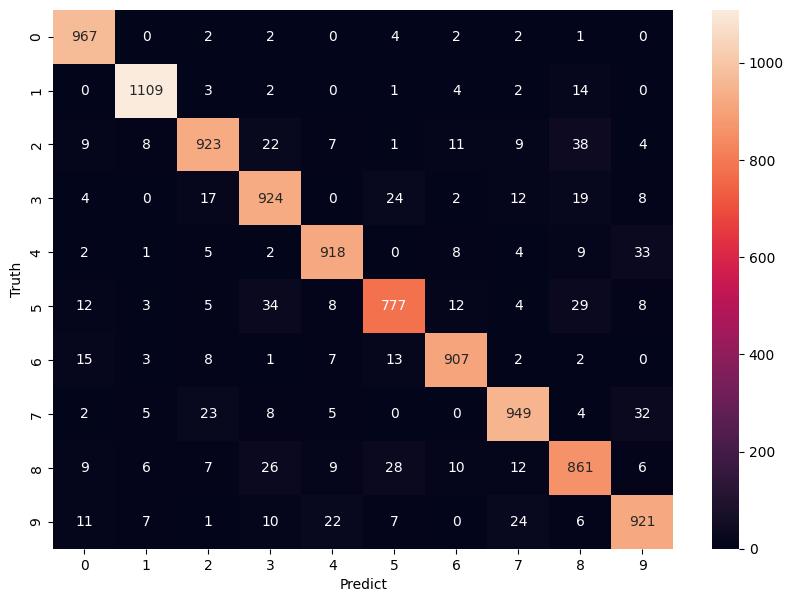

In [29]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predict')
plt.ylabel('Truth')

add hyden layout

In [32]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2753 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1235 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0861 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0658 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0508 - accuracy: 0.9847


In [33]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0866 - accuracy: 0.9726


[0.08663889765739441, 0.972599983215332]

Text(95.72222222222221, 0.5, 'Truth')

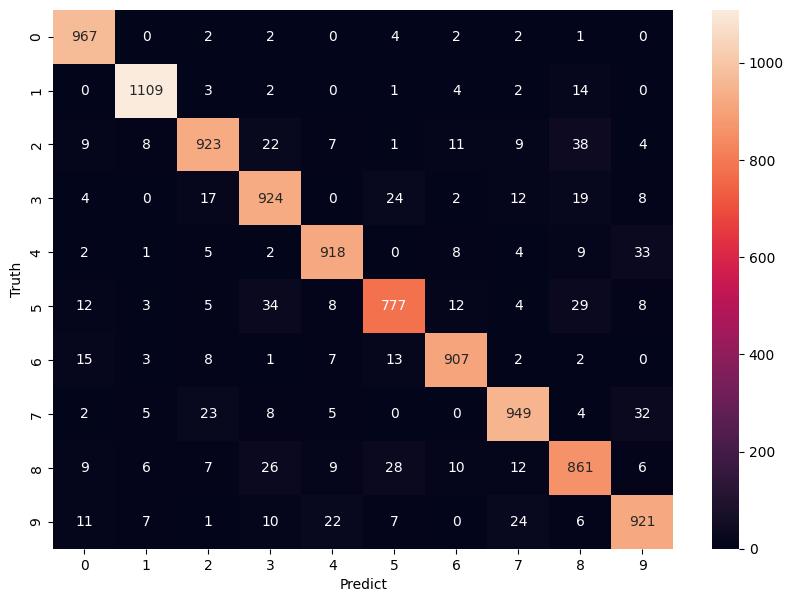

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predict')
plt.ylabel('Truth')

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2688 - accuracy: 0.9238
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1233 - accuracy: 0.9648
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0855 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0516 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0411 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0281 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0231 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.019